In [2]:
from tikz import *
from utils import *
# draw_connection api
def draw_connection(pic,from_point,to_point,line_width="0.48mm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",scale=1):
    line_width = change_to_cm(str(line_width))*scale
    arrow_line_width = line_width * 1.5
    arrow_line_width = f"{arrow_line_width}cm"
    if isinstance(from_point,tuple) or isinstance(from_point,list):
        from_point = str(tuple(from_point))
    if isinstance(to_point,tuple) or isinstance(to_point,list):
        to_point = str(tuple(to_point))
    if isinstance(from_point,np.ndarray):
        from_point = str(tuple(from_point))
    if isinstance(to_point,np.ndarray):
        to_point = str(tuple(to_point))
    arrow_length = f"{22.6*line_width+0.48}mm"
    color = str(color) if str(color).startswith("\\") else r"{%s}"%(str(color))
    opacity = str(opacity) if str(opacity).startswith("\\") else r"{%s}"%(str(opacity))
    line_width = f"{line_width}cm"
    arrow_type = str(arrow_type) if str(arrow_type).startswith("-") else r"-%s"%(str(arrow_type))
    arrow_line_width = str(arrow_line_width) if str(arrow_line_width).startswith("\\") else r"{%s}"%(str(arrow_line_width))
    pic.draw(from_point, r"-- node {\tikz \draw[%s,line width=%s,draw=%s] (-%s,0) -- ++(%s,0);} %s"%(arrow_type,arrow_line_width,color,str(arrow_length),str(arrow_length),str(to_point)),
                    opt=r"line width=%s,every node/.style={sloped,allow upside down},draw=%s,opacity=%s"%(line_width,color,opacity))
    return pic

def init_tikz(pic=None,sty_file_path="./"):
    if pic is None:
        pic = Picture(x="{(1cm,0cm)}",y="{(0cm,1cm)}",z="{(-0.5cm,-0.5cm)}")
    sty_file_path = os.path.abspath(sty_file_path).replace("\\","/")
    pic.usetikzlibrary("arrows.meta")
    pic.usetikzlibrary("quotes")
    pic.usetikzlibrary("positioning")
    pic.usetikzlibrary("3d")
    pic.usepackage("graphicx")
    pic.usepackage("tikz-layers")
    pic.add_preamble(r"\newcommand{\midarrow}{\tikz \draw[-Stealth,line width =0.8mm,draw=\edgecolor] (-0.3,0) -- ++(0.3,0);}")
    pic.add_preamble(r"\newcommand{\copymidarrow}{\tikz \draw[-Stealth,line width=0.8mm,draw={rgb:blue,4;red,1;green,1;black,3}] (-0.3,0) -- ++(0.3,0);}")
    pic.usepackage(os.path.join(sty_file_path,"Ball").replace("\\","/"))
    pic.usepackage(os.path.join(sty_file_path,"Box").replace("\\","/"))
    pic.usepackage(os.path.join(sty_file_path,"RightBandedBox").replace("\\","/"))
    return pic
def to_input( pic:Picture,pathfile, to='(-3,0,0)', width=8, height=8, name="temp",scale=1.0,offset=(0,0,0),opt=r"canvas is zy plane at x=0"):
    pathfile = os.path.abspath(pathfile).replace("\\","/")
    width = change_to_cm(str(width))
    height = change_to_cm(str(height))
    if check_isdigit(to):
        to = get_digit_tuple(str(to))
        to = "("+",".join(list(map(lambda x:str(change_to_cm(str(x))*scale)+"",to)))+")"
    pic.coordinate("qwertyuiopasdfghjklzxcvbnm",at=to,opt="shift={%s}"%(str(offset)))
    pic.node("""\includegraphics[width=%s,height=%s]{%s}"""%(str(width*80/2.84526/1.399/2*scale)+"mm",str(height*80/2.84526/1.399/2*scale)+"mm",pathfile),at="(qwertyuiopasdfghjklzxcvbnm)",name=name,opt=opt)
    pic.coordinate(f"{name}-north",at=f"({name}.north)")
    pic.coordinate(f"{name}-east",at=f"({name}.center)")
    pic.coordinate(f"{name}-west",at=f"({name}.center)")
    pic.coordinate(f"{name}-south",at=f"({name}.south)")
    pic.coordinate(f"{name}-northeast",at=f"({name}.north)")
    pic.coordinate(f"{name}-northwest",at=f"({name}.north)")
    pic.coordinate(f"{name}-southeast",at=f"({name}.south)")
    pic.coordinate(f"{name}-southwest",at=f"({name}.south)")
    return pic
def draw_box( pic,name, zlabel=256, xlabel=64, ylabel=" ",offset="(0,0,0)", to="(0,0,0)", width=1, height=40, depth=40, caption=" ",fill_color=r"\ConvColor",scale=1,opacity=0.7):
    if isinstance(xlabel,tuple) or isinstance(xlabel,list):
        assert (isinstance(width,tuple) or isinstance(width,list)) and len(xlabel)==len(width),"xlabel and width must be tuple or list and have same length"
    if isinstance(width,tuple) or isinstance(width,list):
        width = list(map(lambda x:change_to_cm(str(x)),width))
    else:
        width = change_to_cm(str(width))
    height = change_to_cm(str(height))
    depth = change_to_cm(str(depth))
    if check_isdigit(offset):
        offset = get_digit_tuple(str(offset))
        offset = "("+",".join(list(map(lambda x:str(change_to_cm(str(x))*scale)+"",offset)))+")"
    if check_isdigit(to):
        to = get_digit_tuple(str(to))
        to = "("+",".join(list(map(lambda x:str(change_to_cm(str(x))*scale)+"",to)))+")"
    yscale = scale
    zscale = scale
    xscale = scale
    pic._append(Raw(r"""
\pic[shift={"""+ offset +"""}] at """+ to +""" 
    {Box={
        name=""" + name +""",
        caption="""+ caption +r""",
        xlabel={{"""+ ",".join(returnStrList(xlabel)) +""", }},
        ylabel="""+ str(ylabel) +""",
        zlabel="""+ str(zlabel) +""",
        fill="""+ fill_color +""",
        height="""+ str(height) +""",
        width={"""+ ",".join(returnStrList(width)) +"""},
        depth="""+ str(depth) +""",
        scale="""+ str(scale) +""",
        opacity="""+ str(opacity) +""",
        xscale="""+ str(xscale) +""",
        yscale="""+ str(yscale) +""",
        zscale="""+ str(zscale) +"""
        }
    };
"""))
    return pic
def draw_ball(pic, name, offset="(0,0,0)", to="(0,0,0)", radius=2.5, opacity=0.6,color=r"\SumColor",logo=r"$+$",scale=1,caption=" "):
    radius = change_to_cm(str(radius))
    if check_isdigit(offset):
        offset = get_digit_tuple(str(offset))
        offset = "("+",".join(list(map(lambda x:str(change_to_cm(str(x))*scale)+"",offset)))+")"
    if check_isdigit(to):
        to = get_digit_tuple(str(to))
        to = "("+",".join(list(map(lambda x:str(change_to_cm(str(x))*scale)+"",to)))+")"
    # scale = scale*0.03514598
    pic._append(Raw(r"""
\pic[shift={"""+ offset +"""}] at """+ to +""" 
    {Ball={
        name=""" + name +""",
        fill="""+ color +""",
        opacity="""+ str(opacity) +""",
        radius="""+ str(radius) +""",
        logo="""+ logo +""",
        scale="""+ str(scale) +""",
        caption="""+ caption +"""
        }
    };
"""))
    return pic
def draw_right_banded_box(pic, name, zlabel=256, xlabel=64, ylabel=" ",offset="(0,0,0)", to="(0,0,0)", width=6, height=40, depth=40, opacity=0.2, caption=" ",scale=1,fill_color=r"\ConvColor",bandfill_color=r"\ConvReluColor",band_opacity=0.4):
    if isinstance(xlabel,tuple) or isinstance(xlabel,list):
        assert (isinstance(width,tuple) or isinstance(width,list)) and len(xlabel)==len(width),"xlabel and width must be tuple or list and have same length"
    if isinstance(width,tuple) or isinstance(width,list):
        width = list(map(lambda x:change_to_cm(str(x)),width))
    else:
        width = change_to_cm(str(width))
    height = change_to_cm(str(height))
    depth = change_to_cm(str(depth))
    if check_isdigit(offset):
        offset = get_digit_tuple(str(offset))
        offset = "("+",".join(list(map(lambda x:str(change_to_cm(str(x)))+"",offset)))+")"
    if check_isdigit(to):
        to = get_digit_tuple(str(to))
        to = "("+",".join(list(map(lambda x:str(change_to_cm(str(x)))+"",to)))+")"
    yscale = scale
    zscale = scale
    xscale = scale
    pic._append(Raw(r"""
\pic[shift={ """+ offset +""" }] at """+ to +""" 
    {RightBandedBox={
        name="""+ name + """,
        caption="""+ caption + """,
        xlabel={{ """+ ",".join(returnStrList(xlabel)) +""", }},
        ylabel="""+ str(ylabel) +""",
        zlabel="""+ str(zlabel) +""",
        fill="""+ fill_color +""",
        bandfill="""+ bandfill_color +""",
        opacity="""+ str(opacity) +""",
        height="""+ str(height) +""",
        width={"""+ ",".join(returnStrList(width)) +"""},
        depth="""+ str(depth) +""",
        scale="""+ str(scale) +""",
        bandopacity="""+ str(band_opacity) +""",
        yscale="""+ str(yscale) +""",
        zscale="""+ str(zscale) +""",
        xscale="""+ str(xscale) +"""
        }
    };
"""))
    return pic
def draw_Conv2(pic:Picture, name, zlabel=128, xlabel=16, ylabel=" ",offset="(0,0,0)", to="(0,0,0)", width=1, height=10, depth=10,scale=1,opacity=1):
    pic  =draw_box(pic,f"{name}_Conv1",offset=offset,to=to,width=width,height=height,depth=depth,fill_color=r"\ConvColor",scale=scale,xlabel=xlabel,zlabel="",opacity=opacity)
    pic  =draw_box(pic,f"{name}_norm1",offset="(0,0,0)",to=f"({name}_Conv1-east)",width=width*0.3,height=height,depth=depth,fill_color=r"\normColor",scale=scale,xlabel="",zlabel="",opacity=opacity)
    pic  =draw_box(pic,f"{name}_relu1",offset="(0,0,0)",to=f"({name}_norm1-east)",width=width*0.3,height=height,depth=depth,fill_color=r"\ConvReluColor",scale=scale,xlabel="",zlabel="",opacity=opacity)
    pic = draw_box(pic,f"{name}_Conv2",offset="(0,0,0)",to=f"({name}_relu1-east)",width=width,height=height,depth=depth,fill_color=r"\ConvColor",scale=scale,xlabel=xlabel,zlabel="",opacity=opacity)
    pic  =draw_box(pic,f"{name}_norm2",offset="(0,0,0)",to=f"({name}_Conv2-east)",width=width*0.3,height=height,depth=depth,fill_color=r"\normColor",scale=scale,xlabel="",zlabel="",opacity=opacity)
    pic  =draw_box(pic,f"{name}_relu2",offset="(0,0,0)",to=f"({name}_norm2-east)",width=width*0.3,height=height,depth=depth,fill_color=r"\ConvReluColor",scale=scale,xlabel=" ",zlabel=zlabel,opacity=opacity)
    pic.coordinate(f"{name}-west",f"({name}_Conv1-west)")
    pic.coordinate(f"{name}-east",f"({name}_relu2-east)")
    return pic
def draw_skip(pic, of, to, of_pos=1.25,to_pos=None,pos=None):
    if pos is not None:
        of_pos = pos
        to_pos = pos
    if to_pos is None:
        to_pos = of_pos
    pic._append(Raw(r"""
\path ("""+ of +"""-southeast) -- ("""+ of +"""-northeast) coordinate[pos="""+ str(of_pos) +"""] ("""+ of +"""-top) ;
\path ("""+ to +"""-south)  -- ("""+ to +"""-north)  coordinate[pos="""+ str(to_pos) +"""] ("""+ to +"""-top) ;
\draw [ultra thick,every node/.style={sloped,allow upside down},draw={rgb:blue,4;red,1;green,1;black,3},opacity=0.7]  ("""+of+"""-northeast)  
-- node {\copymidarrow}("""+of+"""-top)
-- node {\copymidarrow}("""+to+"""-top)
-- node {\copymidarrow} ("""+to+"""-north);
"""))
    return pic
def draw_Down(pic:Picture,name, zlabel=128, xlabel=16, ylabel=" ",offset="(0,0,0)", to="(0,0,0)", width=1, height=10, depth=10,scale=1,pool_factor=0.8,pool_zlabel=64,opacity=1):
    pic = draw_Conv2(pic,name,zlabel,xlabel,ylabel,offset,to,width,height,depth,scale,opacity=opacity)
    pic = draw_box(pic,f"{name}_pool",offset="(0,0,0)",to=f"({name}_relu2-east)",width=width*0.3,height=height,depth=depth,fill_color=r"\PoolColor",scale=scale*pool_factor,xlabel=" ",zlabel=pool_zlabel,opacity=opacity)
    pic.coordinate(f"{name}-east",f"({name}_pool-east)")
    pic.coordinate(f"{name}-west",f"({name}_Conv1-west)")
    return pic
def draw_Up(pic,name, zlabel=128, xlabel=16, ylabel=" ",offset="(0,0,0)", to="(0,0,0)", width=1, height=10, depth=10,scale=1,unpool_factor=0.8,unpool_zlabel=64,opacity=1):
    pic = draw_box(pic,f"{name}_upsample",offset=offset,to=to,width=width*0.3,height=height,depth=depth,fill_color=r"\UnpoolColor",scale=scale/unpool_factor,xlabel=" ",zlabel=" ",opacity=opacity)
    pic = draw_Conv2(pic,name,zlabel,xlabel,ylabel,str((0,0,0)),f"({name}_upsample-east)",width,height,depth,scale/pool_factor,opacity=opacity)
    pic.coordinate(f"{name}-east",f"({name}_relu2-east)")
    pic.coordinate(f"{name}-west",f"({name}_upsample-west)")
    return pic
def setColor(pic,normColor="rgb,255:red,245; green,245; blue,245",edgeColor="rgb,255:red,220; green,220; blue,220",ConvColor="rgb,255:red,0; green,76; blue,153",ConvReluColor="rgb,255:red,153; green,204; blue,255",PoolColor="rgb,255:red,255; green,204; blue,153",UnpoolColor="rgb,255:red,255; green,128; blue,0",FcColor="rgb:blue,5;red,2.5;white,5",FcReluColor="rgb:blue,5;red,5;white,4",SoftmaxColor="rgb:magenta,5;black,7",SumColor="rgb:blue,5;green,15"):
    pic.add_preamble(r"""\def\normColor{%s}
\def\edgecolor{%s}
\def\ConvColor{%s}
\def\ConvReluColor{%s}
\def\PoolColor{%s}
\def\UnpoolColor{%s}
\def\FcColor{%s}
\def\FcReluColor{%s}
\def\SoftmaxColor{%s}
\def\SumColor{%s}"""%(normColor,edgeColor,ConvColor,ConvReluColor,PoolColor,UnpoolColor,FcColor,FcReluColor,SoftmaxColor,SumColor))
    return pic
def draw_connection_between_layers(pic,next_layers_func,from_point,to_point,line_width="0.48mm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=1):
    line_width = change_to_cm(str(line_width))*conn_scale
    arrow_line_width = line_width * 1.5
    arrow_line_width = f"{arrow_line_width}cm"
    if isinstance(from_point,tuple) or isinstance(from_point,list):
        from_point = str(tuple(from_point))
    if isinstance(to_point,tuple) or isinstance(to_point,list):
        to_point = str(tuple(to_point))
    if isinstance(from_point,np.ndarray):
        from_point = str(tuple(from_point))
    if isinstance(to_point,np.ndarray):
        to_point = str(tuple(to_point))
    arrow_length = f"{22.6*line_width+0.48}mm"
    color = str(color) if str(color).startswith("\\") else r"{%s}"%(str(color))
    opacity = str(opacity) if str(opacity).startswith("\\") else r"{%s}"%(str(opacity))
    line_width = f"{line_width}cm"
    arrow_type = str(arrow_type) if str(arrow_type).startswith("-") else r"-%s"%(str(arrow_type))
    arrow_line_width = str(arrow_line_width) if str(arrow_line_width).startswith("\\") else r"{%s}"%(str(arrow_line_width))
    next_layers_func()
    pic.draw(from_point, r"-- node {\tikz \draw[%s,line width=%s,draw=%s] (-%s,0) -- ++(%s,0);} %s"%(arrow_type,arrow_line_width,color,str(arrow_length),str(arrow_length),str(to_point)),
                    opt=r"line width=%s,every node/.style={sloped,allow upside down},draw=%s,opacity=%s"%(line_width,color,opacity))
    next_layers_func()
    return pic



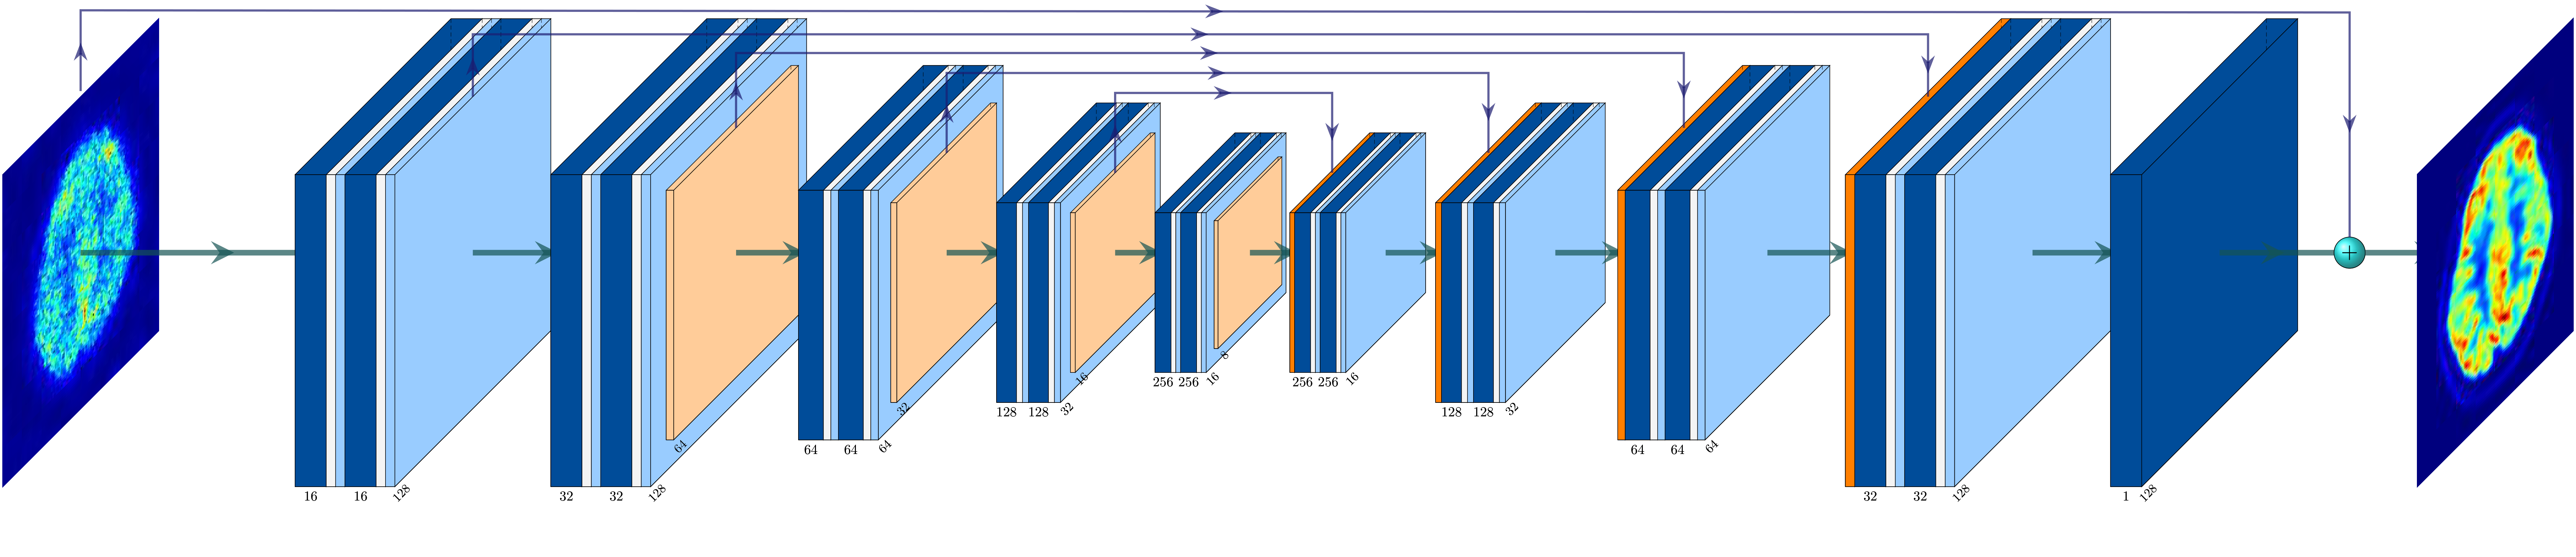

In [4]:
pic = init_tikz()
scale = 0.8
pool_factor = 0.8
opacity=1
d = 5

pic = setColor(pic)
input = lambda:to_input(pic,"noise_img.jpg",to='(0,0,0)', width=10, height=10, name="input",scale=scale)
start_conv = lambda:draw_Conv2(pic,"start_conv",zlabel=128, xlabel=16, ylabel=" ",offset=str((d*1.5,0,0)), to="(input.center)", width=1, height=10, depth=10,scale=scale,opacity=opacity)
down1 = lambda:draw_Down(pic,"down1",zlabel=128, xlabel=32, ylabel=" ",offset=str((d,0,0)), to="(start_conv_relu2-east)", width=1, height=10, depth=10,scale=scale,pool_factor=pool_factor,pool_zlabel=64,opacity=opacity)
down2 = lambda:draw_Down(pic,"down2",zlabel=64, xlabel=64, ylabel=" ",offset=str((d,0,0)), to="(down1_pool-east)", width=1, height=10, depth=10,scale=scale*pool_factor,pool_factor=pool_factor,pool_zlabel=32,opacity=opacity)
down3 = lambda:draw_Down(pic,"down3",zlabel=32, xlabel=128, ylabel=" ",offset=str((d,0,0)), to="(down2_pool-east)", width=1, height=10, depth=10,scale=scale*pool_factor**2,pool_factor=pool_factor,pool_zlabel=16,opacity=opacity)
down4 = lambda: draw_Down(pic,"down4",zlabel=16, xlabel=256, ylabel=" ",offset=str((d,0,0)), to="(down3_pool-east)", width=1, height=10, depth=10,scale=scale*pool_factor**3,pool_factor=pool_factor,pool_zlabel=8,opacity=opacity)
up4 = lambda:draw_Up(pic,"up4",zlabel=16, xlabel=256, ylabel=" ",offset=str((d,0,0)), to="(down4_pool-east)", width=1, height=10, depth=10,scale=scale*pool_factor**4,unpool_factor=pool_factor,unpool_zlabel=8,opacity=opacity)
up3 = lambda:draw_Up(pic,"up3",zlabel=32, xlabel=128, ylabel=" ",offset=str((d,0,0)), to="(up4_relu2-east)", width=1, height=10, depth=10,scale=scale*pool_factor**3,unpool_factor=pool_factor,unpool_zlabel=16,opacity=opacity)
up2 = lambda:draw_Up(pic,"up2",zlabel=64, xlabel=64, ylabel=" ",offset=str((d,0,0)), to="(up3_relu2-east)", width=1, height=10, depth=10,scale=scale*pool_factor**2,unpool_factor=pool_factor,unpool_zlabel=32,opacity=opacity)
up1 = lambda:draw_Up(pic,"up1",zlabel=128, xlabel=32, ylabel=" ",offset=str((d,0,0)), to="(up2_relu2-east)", width=1, height=10, depth=10,scale=scale*pool_factor,unpool_factor=pool_factor,unpool_zlabel=64,opacity=opacity)
final_conv = lambda:draw_box(pic,f"final_conv",offset=str((d,0,0)),to="(up1_relu2-east)",width=1,height=10,depth=10,fill_color=r"\ConvColor",scale=scale,xlabel=1,zlabel=128,opacity=opacity)
add = lambda:draw_ball(pic,"add",color="cyan",scale=scale,offset=str((d/1.5,0,0)),to="(final_conv-east)",radius=0.5)
output = lambda:to_input(pic,"clean_img.jpg",to='(add-east)', width=10, height=10, name="output",scale=scale,offset=(d/1.5,0,0))


conn_scale=0.3
pic = input()
pic = draw_connection_between_layers(pic,start_conv,"(input.center)","(start_conv-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,down1,"(start_conv-east)","(down1-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,down2,"(down1-east)","(down2-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,down3,"(down2-east)","(down3-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,down4,"(down3-east)","(down4-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,up4,"(down4-east)","(up4-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,up3,"(up4-east)","(up3-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,up2,"(up3-east)","(up2-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,up1,"(up2-east)","(up1-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,final_conv,"(up1-east)","(final_conv-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,add,"(final_conv-east)","(add-west)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_connection_between_layers(pic,output,"(add-east)","(output.center)",line_width="0.48cm",arrow_type="stealth",color="rgb:blue,4;red,1;green,4;black,3",opacity="0.7",conn_scale=conn_scale)
pic = draw_skip(pic, "down3_pool", "up4_upsample", pos=1.5)
pic = draw_skip(pic, "down2_pool", "up3_upsample", pos=1.4)
pic = draw_skip(pic, "down1_pool", "up2_upsample", pos=1.3)
pic = draw_skip(pic, "start_conv_relu2", "up1_upsample", pos=1.2)
pic = draw_skip(pic, "input", "add", of_pos=1.25,to_pos=8.2)
pic.demo(dpi=300)
pic.write_image('output.png')
# print(pic.document_code())